In [1]:
T = BigFloat  # precision type (change here if needed)
setprecision(T, 128) 

# T = Float64;

include("CosmoTimeStepExpr.jl")
include("CosmoCoeffExpr.jl")
include("CosmoConstrExpr.jl")
include("cheb.jl")
include("solvers.jl")

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

const E = exp(T(1.));

const H = T(3.);
const Om = T(4.);
const tstar = T(1.);

In [2]:
Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;

zmin = T(0.);
zmax = T(.6);


DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

In [5]:
InitGuess = zeros(T,NVar,N);
zAH = T(0.5);
X = zero(T);
tinit = T(-3.)
p2 = 0;
inita4 = T(-100);
M  = one(T);
margin = 10;

In [6]:
X = T(1.23);
Var = copy(InitGuess);

for ii in 1:200
    Var[2,1:N] = LinearSolveODE(Var, 1, inita4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, inita4, X, tinit);
    X = CorrectXi(Var, X, tinit, margin);
    print("\rX = $X")
    flush(stdout)
end

X = 1.232595201559296418598213036316368947474

In [7]:
# Having computed ξ(t_0), we change the grid so that it ends precisely at the apparent horizon, zmax = zAH
# This seemed to have made the code run better, but more testing would be good.

#Or let's try this instead.

initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1.e-15);
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);

In [8]:
InitVar = ComputeBulk(Var[1,1:N], initX, inita4, tinit);

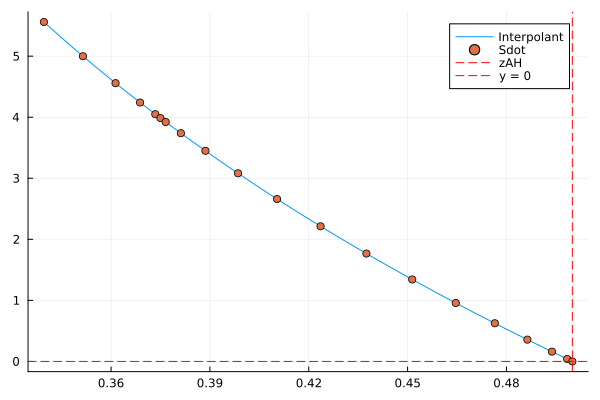

In [10]:
fig = PlotSdot(InitVar, initX,tinit, 40);
display(fig)

In [13]:
dt = T(.001);

OutputArr = [];
MonitorArr = [];

Evolve(InitVar, initX, inita4, T(tinit), -1, dt, 2, OutputArr, MonitorArr)

◑ time = -1.000, constraint violation = 0.000    Time: 0:21:08

In [ ]:
# using Serialization

# open("cosmo_until_t_minus1.dat","w") do io
#     serialize(io, OutputArr);
# end

In [15]:
TimeArr = [x[1][1] for x in OutputArr];
XArr = [x[2][1] for x in OutputArr];

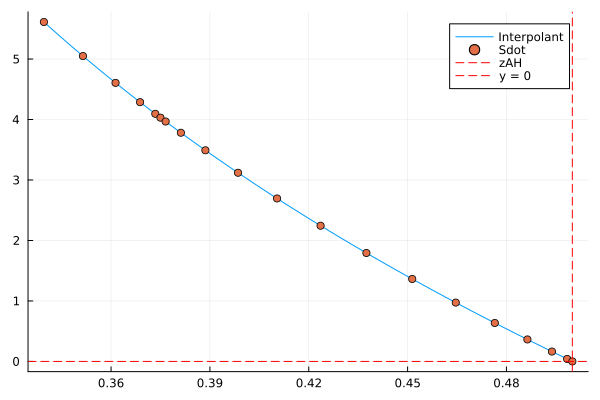

In [17]:
PlotSdot(OutputArr[end][4][:,:],XArr[end],TimeArr[end],40)

In [18]:
Energy = [x[1] for x in MonitorArr];
Momentum = [x[2] for x in MonitorArr];
Operator = [x[3] for x in MonitorArr];
Constraint = [x[4] for x in MonitorArr[2:end]];

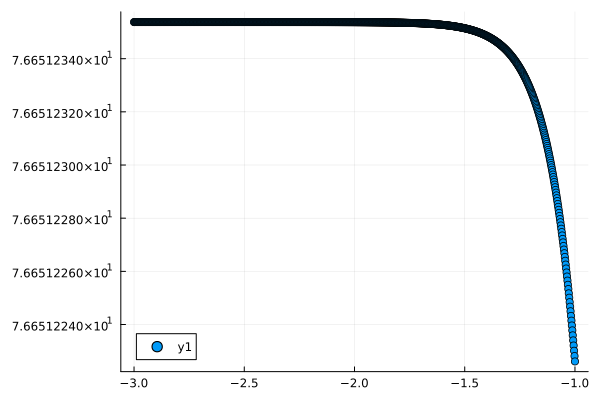

In [21]:
plt.scatter(TimeArr,Energy)

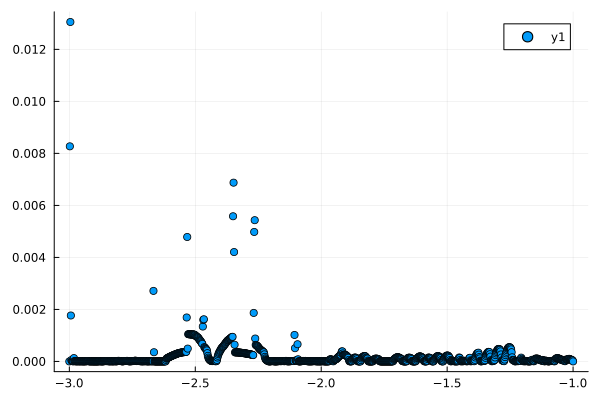

In [20]:
plt.scatter(TimeArr,Constraint)

In [22]:
VarM1 = copy(OutputArr[end][4][:,:]);
a4M1 = copy(OutputArr[end][3][1]);
XM1 = copy(OutputArr[end][2][1]);
tM1 = copy(OutputArr[end][1][1]);

In [24]:
dt = T(.001);

OutputArr = [];
MonitorArr = [];

Evolve(VarM1, XM1, a4M1, tM1, 2, dt, 20, OutputArr, MonitorArr)

◑ time = 1.172, constraint violation = 0.009    Time: 0:22:36m

LoadError: InterruptException:

In [26]:
Energy2 = [x[1] for x in MonitorArr];
Momentum2 = [x[2] for x in MonitorArr];
Operator2 = [x[3] for x in MonitorArr];
Constraint2 = [x[4] for x in MonitorArr[2:end]];

TimeArr2 = [x[1][1] for x in OutputArr];
XArr2 = [x[2][1] for x in OutputArr];

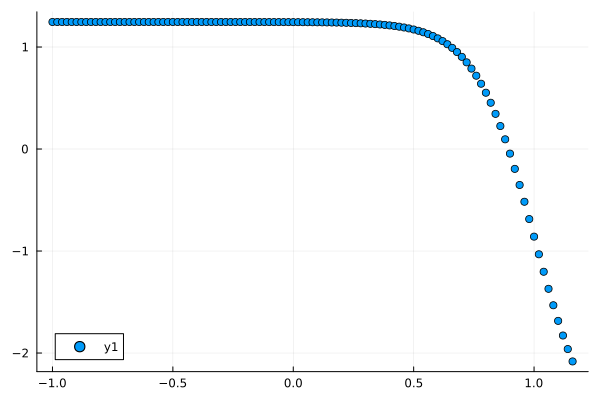

In [27]:
plt.scatter(TimeArr2, XArr2)

6.245004513516505539882928133010864257812e-17

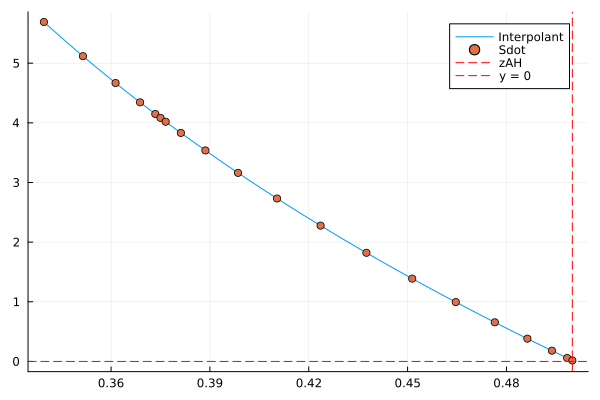

In [32]:
ind = 51;
display(TimeArr2[ind])
fig=PlotSdot(OutputArr[ind][4][:,:],XArr2[ind],TimeArr2[ind],40);
display(fig)

In [ ]:
# using Serialization

# open("cosmo__tM1_tP1.dat","w") do io
#     serialize(io, OutputArr);
# end

In [33]:
Var0 = copy(OutputArr[51][4][:,:]);
a40 = copy(OutputArr[51][3][1]);
X0 = copy(OutputArr[51][2][1]);
t0 = copy(OutputArr[51][1][1]);

In [34]:
dt = T(.0002);

OutputArr = [];
MonitorArr = [];

Evolve(Var0, X0, a40, t0, 2, dt, 10, OutputArr, MonitorArr)

◒ time = 1.362, constraint violation = 0.026    Time: 1:20:55

LoadError: InterruptException:

In [35]:
Energy2 = [x[1] for x in MonitorArr];
Momentum2 = [x[2] for x in MonitorArr];
Operator2 = [x[3] for x in MonitorArr];
Constraint2 = [x[4] for x in MonitorArr[2:end]];

TimeArr2 = [x[1][1] for x in OutputArr];
XArr2 = [x[2][1] for x in OutputArr];

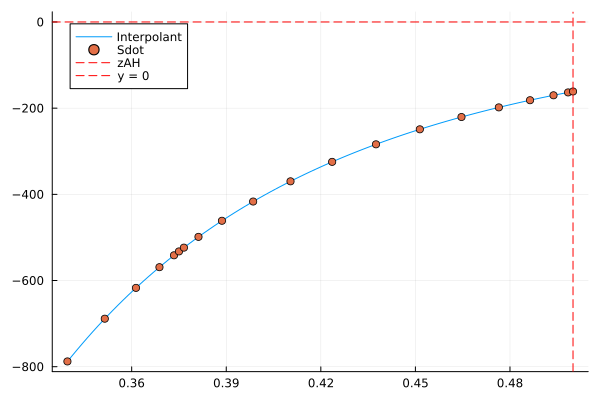

In [36]:
fig=PlotSdot(OutputArr[end][4][:,:],XArr2[end],TimeArr2[end],40);
display(fig)